# Loading Libraries , packages and modules for project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing.imputation import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


# Loading Data file (datamart_train)

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


# Data exploration

In [4]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.size

1000

In [7]:
df.shape

(200, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

## Data Skewness and Kurtosis 

In [37]:
from scipy.stats import skew, kurtosis
for i in df.columns:
    print ('*******skewness of', i, ' column**********')
    print (skew(df[i]))
    print ('*******kurtosis of', i, ' column**********')
    print (kurtosis(df[i]))

# Inference: The results suggesting there all the data is normally distributed (skewness and kurotosis are in normal range)

*******skewness of TV  column**********
-0.06932836662244649
*******kurtosis of TV  column**********
-1.2258970752747362
*******skewness of radio  column**********
0.0934668451108453
*******kurtosis of radio  column**********
-1.2589619024872696
*******skewness of newspaper  column**********
0.8879959753085498
*******kurtosis of newspaper  column**********
0.603526874867891
*******skewness of sales  column**********
0.4045082487061191
*******kurtosis of sales  column**********
-0.4285695342675746


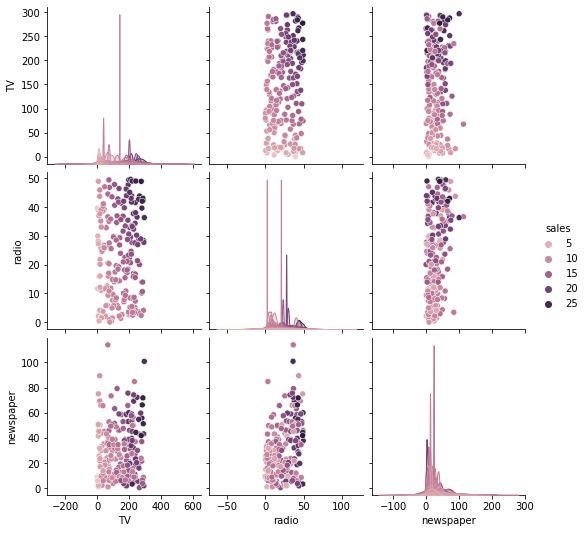

In [12]:
sns.pairplot(data = df, hue='sales')

# columns distribution

*******Distribution plot TV *************


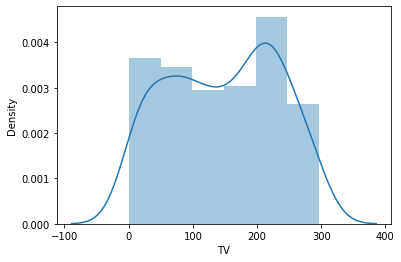

*********violin plots TV  *************


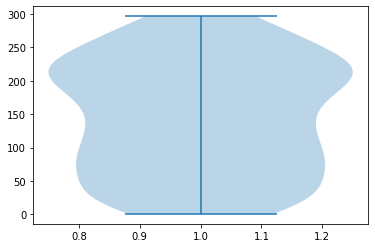




*******Distribution plot radio *************


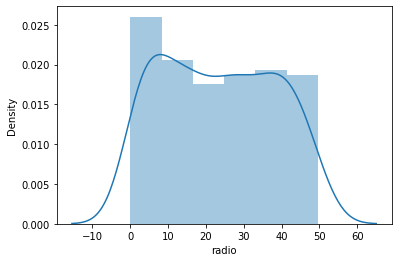

*********violin plots radio  *************


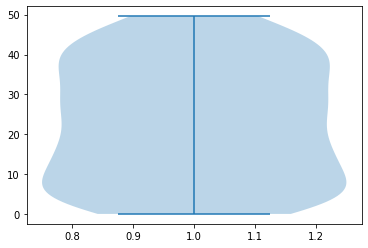




*******Distribution plot newspaper *************


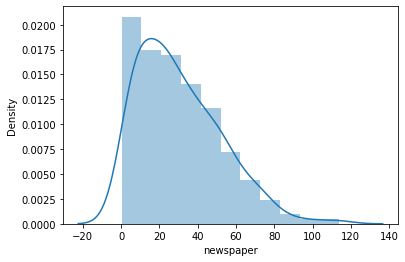

*********violin plots newspaper  *************


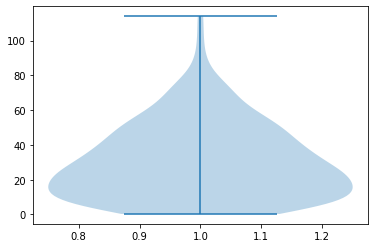




*******Distribution plot sales *************


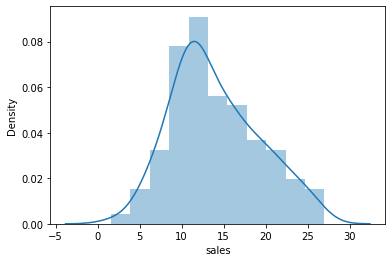

*********violin plots sales  *************


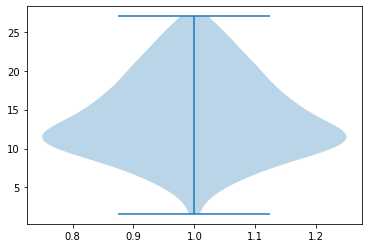

In [16]:
# distribution map
for i in df.columns:
    print ('*******Distribution plot', i, '*************')
    sns.distplot(df[i])
    plt.show()
    print ('*********violin plots', i, ' *************')
    plt.violinplot(df[i])
    plt.show()
    print ('\n\n')
    


# Missing Values

In [18]:
df.isnull().sum()  #There are no missing values in data

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Outliers Identification and Treatment

In [19]:
def outlier_iqr(input_data):
    q1=input_data.quantile(0.25)
    q3=input_data.quantile(0.75)
    iqr = q3-q1
    lower_whisker = q1-(1.5*iqr)
    upper_whisker = q3+(1.5*iqr)
    outlier_list = []
    for i in input_data:
        if i>upper_whisker or i<lower_whisker:
            outlier_list.append(i)
    print ('outliers are', outlier_list)
    print ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)
    return ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)

In [21]:
#Quantifying Outliers
for i in df.columns:
    print('*****outliers are in ',i, 'column')
    outlier_iqr(df[i])

#IQR method suggesting there are no outliers in data 

*****outliers are in  TV column
outliers are []
lower_whisker value : -142.29999999999998 upper_whisker value 435.5
*****outliers are in  radio column
outliers are []
lower_whisker value : -29.849999999999994 upper_whisker value 76.35
*****outliers are in  newspaper column
outliers are [114.0, 100.9]
lower_whisker value : -35.775000000000006 upper_whisker value 93.625
*****outliers are in  sales column
outliers are []
lower_whisker value : -0.16249999999999787 upper_whisker value 27.937499999999996


# Feature Engineering

In [22]:
corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

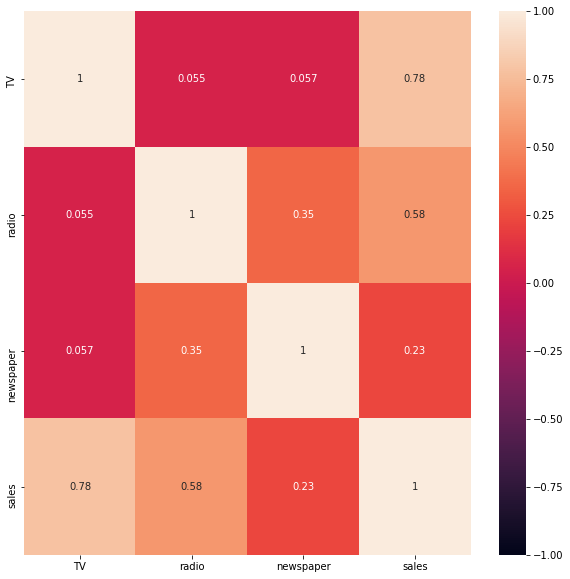

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

In [25]:
#Inference:
# The Target is sales are depending more TV commercials , afterwards on radio and newspaper

# Data Preparation

### Converting data in to array format

In [27]:
x=df[['TV', 'radio', 'newspaper']]
x=np.array(x)
y=df['sales']
y = np.array(y)
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [28]:
print (x)
print ('********************')
print (y)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [30]:
#Data splitting for model evealution 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)




# Regression Models

## Multi Linear Regression (MLR)

In [32]:
from sklearn.linear_model import LinearRegression
mlr_model=LinearRegression(fit_intercept=True)
mlr_model.fit(x_train, y_train)
mlr_pred = mlr_model.predict(x_test)
print ('Model predicted values', mlr_pred)


Model predicted values [18.20860914 19.26266172  8.86526918 15.81915826 19.4851125  17.18863781
 12.168533    8.21162324 21.57774255  5.51943842 11.61360382 13.83787141
 17.00462015 11.03138998 20.72121938 24.65220833  5.48726094 13.26764358
  8.123976    4.69871696 19.82507279 16.28089873 17.0734413  23.18549848
 20.71571449  8.87024916 15.00830069 10.88279987 12.85352274 15.28474902
  7.6163865  19.56799968  9.14424565 10.55293118 24.06684775 15.24074728
  9.98847626  9.0061234  11.69808701 13.7858323 ]


In [33]:
mlr_model.coef_ #(slope values each individual channels)

array([0.0442173 , 0.18865409, 0.00181911])

In [40]:
print ('intercept value:',mlr_model.intercept_)

intercept value: 3.1072135963445433


In [45]:
print ('R2 value of model', round(r2_score(mlr_pred, y_test)*100, 2), '%')

R2 value of model 87.61 %


In [48]:
df1.dtypes

actual value       float64
predicted value    float64
dtype: object

In [52]:
import math
df1=pd.DataFrame({'actual value':y_test, 'predicted value': mlr_pred})
df1['Error value'] = (df1['actual value']-df1['predicted value'])**2
df1.head(15) 

,actual value,predicted value,Error value
0,16.1,18.208609,4.446233
1,18.9,19.262662,0.131524
2,9.7,8.865269,0.696776
3,11.8,15.819158,16.153633
4,19.8,19.485113,0.099154
5,17.1,17.188638,0.007857
6,11.7,12.168533,0.219523
7,9.7,8.211623,2.215265
8,23.2,21.577743,2.631719
9,7.6,5.519438,4.328736


## Decision Tree Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor(criterion='mse', splitter='best', random_state=None)
DT_model.fit(x_train, y_train)
DT_pred = DT_model.predict(x_test)
print (DT_pred)


[15.9 17.6  9.3 12.7 17.4 17.6 13.4  9.4 21.8  8.1  9.2 14.  18.4  9.2
 22.3 25.4  5.7 11.7  6.7  6.7 20.2 17.  15.3 24.7 22.3 11.  12.9  7.3
  7.3 15.6  9.4 21.2  7.6  9.2 25.4 14.8 10.1  9.6 11.8 14.4]


In [53]:
print ('R2 value of model', round(r2_score(DT_pred, y_test)*100, 2), '%')

R2 value of model 97.25 %


# Ensemble methods


### Bagging - Random Forest

In [54]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

C:\Users\VARMA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [55]:
rf_model=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeRegressor(criterion='mse'))
rf_model.fit(x_train,y_train) # fitting our bagging tree ensemble using fit method
print (rf_model.oob_score_*100)

96.56474650335173


In [56]:
list1=list(range(10, 300, 20))
list1

[10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290]

In [57]:
for w in range(10,300,20):
    rf_model=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeRegressor(criterion='mse'))
    rf_model.fit(x_train,y_train)
    oob=rf_model.oob_score_*100
    print ('For n_estimators = '+str(w))
    print ('OOB score is =' +str(oob))
    print ('************************')
    

For n_estimators = 10
OOB score is =94.82127906263835
************************
For n_estimators = 30
OOB score is =97.0866381905449
************************
For n_estimators = 50
OOB score is =97.17301517505467
************************
For n_estimators = 70
OOB score is =97.17061376155598
************************
For n_estimators = 90
OOB score is =97.30868150424631
************************
For n_estimators = 110
OOB score is =97.31640800423438
************************
For n_estimators = 130
OOB score is =97.28610370222978
************************
For n_estimators = 150
OOB score is =97.33139569264121
************************
For n_estimators = 170
OOB score is =97.38562110906479
************************
For n_estimators = 190
OOB score is =97.35932779644196
************************
For n_estimators = 210
OOB score is =97.32967377978187
************************
For n_estimators = 230
OOB score is =97.32951969981762
************************
For n_estimators = 250
OOB score is =97.307218

In [66]:
rf_model=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=170,random_state=400,
                      base_estimator=DecisionTreeRegressor())
rf_model.fit(x_train,y_train) 

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=170, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [67]:
imp=[]
for i in rf_model.estimators_:
    imp.append(i.feature_importances_)
print (imp)


[array([0.63475313, 0.36220654, 0.00304033]), array([0.63133147, 0.36390252, 0.00476602]), array([0.67278381, 0.31140401, 0.01581218]), array([0.65503772, 0.329818  , 0.01514428]), array([0.55859518, 0.43464198, 0.00676284]), array([0.65011688, 0.34407939, 0.00580373]), array([0.64546211, 0.33164778, 0.02289012]), array([0.63539731, 0.35857152, 0.00603116]), array([0.56147415, 0.41376207, 0.02476378]), array([0.62050298, 0.37027093, 0.00922608]), array([0.64737683, 0.34548732, 0.00713585]), array([0.60444491, 0.38510073, 0.01045436]), array([0.60437245, 0.37846061, 0.01716694]), array([0.6497787 , 0.34603474, 0.00418656]), array([0.50986797, 0.48115869, 0.00897335]), array([0.66837654, 0.3271871 , 0.00443636]), array([0.63469761, 0.36262632, 0.00267607]), array([0.66782652, 0.3302994 , 0.00187408]), array([0.56519888, 0.42839502, 0.0064061 ]), array([0.63976257, 0.35215206, 0.00808536]), array([0.61452119, 0.38088131, 0.0045975 ]), array([0.65992415, 0.32877435, 0.0113015 ]), array([0.

In [60]:
imp=np.mean(imp,axis=0)
imp

array([0.62189948, 0.36912975, 0.00897076])

In [61]:
#prediction
rf_pred = rf_model.predict(x_test)
print (rf_pred)

[15.50333333 18.85066667 10.23133333 11.85266667 19.02       16.56933333
 12.77266667 10.01466667 22.76266667  8.38333333  7.92733333 14.378
 18.03933333  7.85       22.368      24.99666667  5.06533333 11.96266667
  7.34133333  6.95933333 20.252      16.36       15.50466667 24.088
 22.05533333 10.628      13.13333333  5.76333333  6.57266667 15.17533333
  9.67066667 21.152       7.686       8.086      25.13666667 14.70266667
  9.90933333 10.21666667 12.03066667 14.756     ]


In [62]:
#Visualizing the Decision Tree
!pip install pydotplus

In [63]:
import graphviz
import pydotplus
import sklearn.tree as tree

In [64]:
dot_data =tree.export_graphviz(DT_model, out_file=None,  # export_graphviz is component of tree model
                         filled=True, rounded=True,  
                         special_characters=True,proportion=False)
print (dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<X<SUB>0</SUB> &le; 122.05<br/>mse = 24.81<br/>samples = 160<br/>value = 14.021>, fillcolor="#e5813985"] ;
1 [label=<X<SUB>0</SUB> &le; 30.05<br/>mse = 7.712<br/>samples = 64<br/>value = 9.941>, fillcolor="#e5813959"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>0</SUB> &le; 15.05<br/>mse = 3.258<br/>samples = 17<br/>value = 6.506>, fillcolor="#e5813934"] ;
1 -> 2 ;
3 [label=<X<SUB>0</SUB> &le; 3.05<br/>mse = 2.252<br/>samples = 8<br/>value = 5.137>, fillcolor="#e5813926"] ;
2 -> 3 ;
4 [label=<mse = 0.0<br/>samples = 1<br/>value = 1.6>, fillcolor="#e5813900"] ;
3 -> 4 ;
5 [label=<X<SUB>1</SUB> &le; 33.4<br/>mse = 0.531<br/>samples = 7<br/>value = 5.643>, fillcolor="#e581392b"] ;
3 -> 5 ;
6 [label=<X<SUB>2</SUB> &le; 1.55<br/>mse = 0.086<br/>samples = 6<br/>value = 5.367>, fillcolor="#e5813928"] ;
5 -> 6 ;
7 [label=<mse = 0

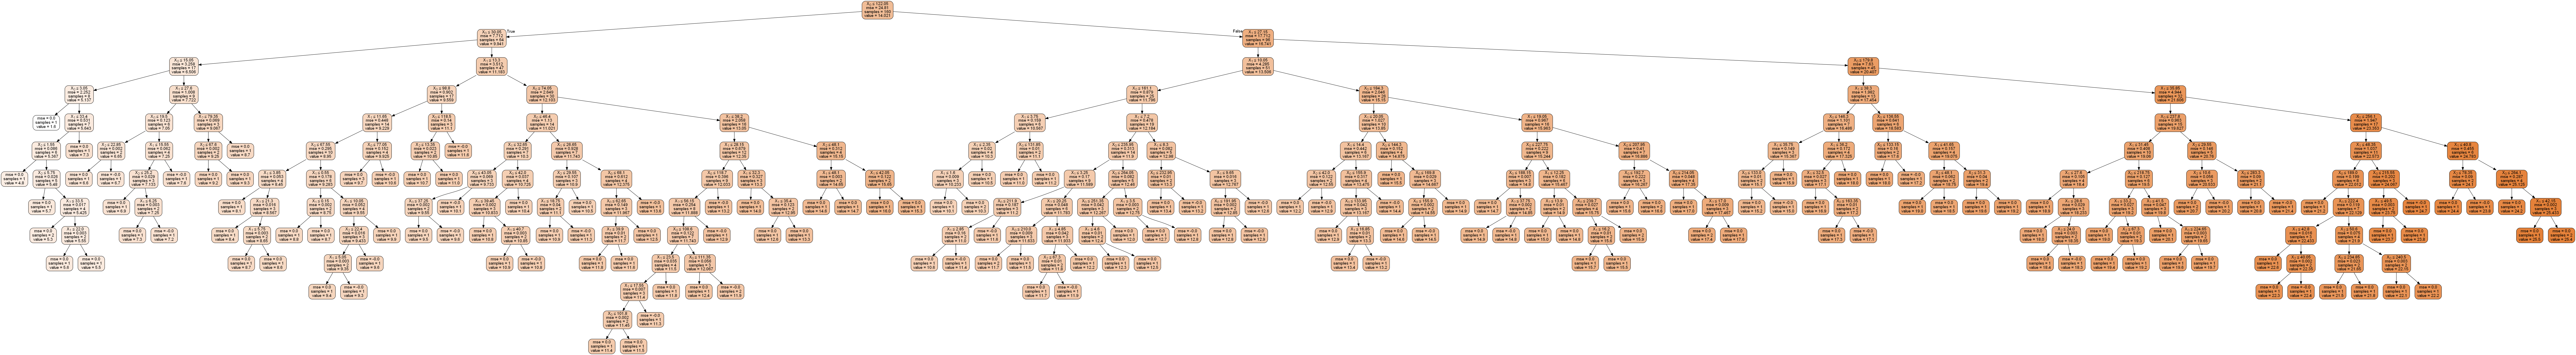

In [65]:
graph = pydotplus.graph_from_dot_data(dot_data)
from IPython.display import Image 
Image(graph.create_png())         